In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb
from array import array

In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


/cvmfs/sphenix.sdcc.bnl.gov/alma9.2-gcc-14.2.0/opt/sphenix/core/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024


In [4]:
direct = 'spring_2025/detdeta_run24_plots/nominal_plots'

In [163]:
#runs = ['23727','23735','23737','23738','23739','23740','23743','23745']
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
cent = cents[6]

lowbound = {'0-5': 500, '5-10':400, '10-20':300, '20-30':190, '30-40':140, '40-50':85, '50-60':50}
highbound = {'0-5': 1000, '5-10':800, '10-20':600, '20-30':410, '30-40':250, '40-50':162, '50-60':95}
#lowbound = {'0-5': 300, '5-10':200, '10-20':100, '20-30':100, '30-40':0, '40-50':0, '50-60':0}
#highbound = {'0-5': 1100, '5-10':1000, '10-20':800, '20-30':600, '30-40':500, '40-50':300, '50-60':200}
starmean = {'0-5': 620, '5-10':515, '10-20':402, '20-30':279, '30-40':187, '40-50':118, '50-60':70}
phenixmean = {'0-5': 599, '5-10':498.7, '10-20':367.8, '20-30':248.5, '30-40':162.7, '40-50':101.1, '50-60':58.6}
staruncert = {'0-5': 33, '5-10':28, '10-20':21, '20-30':15, '30-40':10, '40-50':6, '50-60':4}
phenixuncert = {'0-5': 24.7, '5-10':28.9, '10-20':23.1, '20-30':17.5, '30-40':13.5, '40-50':9.8, '50-60':7.4}

f1 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_reweight_hijing_2024.root')
h_eT_truth = TH1F(f1.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin = TH1F(f1.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin = TH1F(f1.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin = TH1F(f1.Get("hetdeta_calobin"))
h_eT_sim_emcal = TH1F(f1.Get("h_eT_eta_emcal_profile_hist"))
h_eT_sim_ihcal = TH1F(f1.Get("h_eT_eta_ihcal_profile_hist"))
h_eT_sim_ohcal = TH1F(f1.Get("h_eT_eta_ohcal_profile_hist"))
h_eT_sim_calo = TH1F(f1.Get("h_eT_eta_calo_profile_hist"))
h_eT_truth.SetDirectory(0)
h_eT_truth_ihcalbin.SetDirectory(0)
h_eT_truth_ohcalbin.SetDirectory(0)
h_eT_truth_calobin.SetDirectory(0)
h_eT_sim_emcal.SetDirectory(0)
h_eT_sim_ihcal.SetDirectory(0)
h_eT_sim_ohcal.SetDirectory(0)
h_eT_sim_calo.SetDirectory(0)
h_eT_truth_hcalbin = TH1F(f1.Get("hetdeta_hcalbin"))
h_eT_sim_hcal = TH1F(f1.Get("h_eT_eta_hcal_profile_hist"))
h_eT_truth_hcalbin.SetDirectory(0)
h_eT_sim_hcal.SetDirectory(0)
f1.Close()
f2 = ROOT.TFile.Open("fixed_build/dETdeta_analysis_allruns_ana450_2024p009_100_50_50_ZS_hcal_tsc_emcal_calib_iter15_nozs_data_noweight_"+cent+".root")
h_eT_data_emcal = TH1F(f2.Get("h_eT_eta_emcal_profile_hist"))
h_eT_data_ihcal = TH1F(f2.Get("h_eT_eta_ihcal_profile_hist"))
h_eT_data_ohcal = TH1F(f2.Get("h_eT_eta_ohcal_profile_hist"))
h_eT_data_calo = TH1F(f2.Get("h_eT_eta_calo_profile_hist"))
h_eT_data_emcal.SetDirectory(0)
h_eT_data_ihcal.SetDirectory(0)
h_eT_data_ohcal.SetDirectory(0)
h_eT_data_calo.SetDirectory(0)
h_eT_data_hcal = TH1F(f2.Get("h_eT_eta_hcal_profile_hist"))
h_eT_data_hcal.SetDirectory(0)
f2.Close()
f3 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_reweight_epos_2024.root')
h_eT_truth_epos = TH1F(f3.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin_epos = TH1F(f3.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin_epos = TH1F(f3.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin_epos = TH1F(f3.Get("hetdeta_calobin"))
h_eT_epos_emcal = TH1F(f3.Get("h_eT_eta_emcal_profile_hist"))
h_eT_epos_ihcal = TH1F(f3.Get("h_eT_eta_ihcal_profile_hist"))
h_eT_epos_ohcal = TH1F(f3.Get("h_eT_eta_ohcal_profile_hist"))
h_eT_epos_calo = TH1F(f3.Get("h_eT_eta_calo_profile_hist"))
h_eT_truth_epos.SetDirectory(0)
h_eT_truth_ihcalbin_epos.SetDirectory(0)
h_eT_truth_ohcalbin_epos.SetDirectory(0)
h_eT_truth_calobin_epos.SetDirectory(0)
h_eT_epos_emcal.SetDirectory(0)
h_eT_epos_ihcal.SetDirectory(0)
h_eT_epos_ohcal.SetDirectory(0)
h_eT_epos_calo.SetDirectory(0)
h_eT_truth_hcalbin_epos = TH1F(f3.Get("hetdeta_hcalbin"))
h_eT_epos_hcal = TH1F(f3.Get("h_eT_eta_hcal_profile_hist"))
h_eT_truth_hcalbin_epos.SetDirectory(0)
h_eT_epos_hcal.SetDirectory(0)
f3.Close()
f4 = ROOT.TFile.Open('fixed_build/dETdeta_analysis_allruns_run14_with_npart_nozs_mc_reweight_'+cent+'_reweight_ampt_2024.root')
h_eT_truth_ampt = TH1F(f4.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin_ampt = TH1F(f4.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin_ampt = TH1F(f4.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin_ampt = TH1F(f4.Get("hetdeta_calobin"))
h_eT_ampt_emcal = TH1F(f4.Get("h_eT_eta_emcal_profile_hist"))
h_eT_ampt_ihcal = TH1F(f4.Get("h_eT_eta_ihcal_profile_hist"))
h_eT_ampt_ohcal = TH1F(f4.Get("h_eT_eta_ohcal_profile_hist"))
h_eT_ampt_calo = TH1F(f4.Get("h_eT_eta_calo_profile_hist"))
h_eT_truth_ampt.SetDirectory(0)
h_eT_truth_ihcalbin_ampt.SetDirectory(0)
h_eT_truth_ohcalbin_ampt.SetDirectory(0)
h_eT_truth_calobin_ampt.SetDirectory(0)
h_eT_ampt_emcal.SetDirectory(0)
h_eT_ampt_ihcal.SetDirectory(0)
h_eT_ampt_ohcal.SetDirectory(0)
h_eT_ampt_calo.SetDirectory(0)
h_eT_truth_hcalbin_ampt = TH1F(f4.Get("hetdeta_hcalbin"))
h_eT_ampt_hcal = TH1F(f4.Get("h_eT_eta_hcal_profile_hist"))
h_eT_truth_hcalbin_ampt.SetDirectory(0)
h_eT_ampt_hcal.SetDirectory(0)
f4.Close()
f5 = ROOT.TFile.Open("fixed_build/dETdeta_total_variation_"+cent+".root")
emcal_unc = TH1F(f5.Get("emcal_detdeta_dev"))
ihcal_unc = TH1F(f5.Get("ihcal_detdeta_dev"))
ohcal_unc = TH1F(f5.Get("ohcal_detdeta_dev"))
calo_unc = TH1F(f5.Get("calo_detdeta_dev"))
hcal_unc = TH1F(f5.Get("hcal_detdeta_dev"))
emcal_unc.SetDirectory(0)
ihcal_unc.SetDirectory(0)
ohcal_unc.SetDirectory(0)
calo_unc.SetDirectory(0)
hcal_unc.SetDirectory(0)
f5.Close()
pedestalfile = 'pedestal_subtraction/dETdeta_analysis_pedestal_subtraction_54256_fixed_build_default_bins.root'
f6 = ROOT.TFile.Open(pedestalfile)
h_eT_pedestal_emcal = TH1F(f6.Get("h_eT_eta_emcal_profile_hist"))
h_eT_pedestal_ihcal = TH1F(f6.Get("h_eT_eta_ihcal_profile_hist"))
h_eT_pedestal_ohcal = TH1F(f6.Get("h_eT_eta_ohcal_profile_hist"))
h_eT_pedestal_calo = TH1F(f6.Get("h_eT_eta_calo_profile_hist"))
h_eT_pedestal_hcal = TH1F(f6.Get("h_eT_eta_hcal_profile_hist"))
h_eT_pedestal_emcal.SetDirectory(0)
h_eT_pedestal_ihcal.SetDirectory(0)
h_eT_pedestal_ohcal.SetDirectory(0)
h_eT_pedestal_calo.SetDirectory(0)
h_eT_pedestal_hcal.SetDirectory(0)
f6.Close()
for i in range(1, h_eT_data_emcal.GetNbinsX() + 1):
	h_eT_data_emcal.SetBinContent(i, h_eT_data_emcal.GetBinContent(i) - h_eT_pedestal_emcal.GetBinContent(i))
for i in range(1, h_eT_data_ihcal.GetNbinsX() + 1):
	h_eT_data_ihcal.SetBinContent(i, h_eT_data_ihcal.GetBinContent(i) - h_eT_pedestal_ihcal.GetBinContent(i))
for i in range(1, h_eT_data_ohcal.GetNbinsX() + 1):
	h_eT_data_ohcal.SetBinContent(i, h_eT_data_ohcal.GetBinContent(i) - h_eT_pedestal_ohcal.GetBinContent(i))
for i in range(1, h_eT_data_calo.GetNbinsX() + 1):
	h_eT_data_calo.SetBinContent(i, h_eT_data_calo.GetBinContent(i) - h_eT_pedestal_calo.GetBinContent(i))
for i in range(1, h_eT_data_hcal.GetNbinsX() + 1):
    h_eT_data_hcal.SetBinContent(i, h_eT_data_hcal.GetBinContent(i) - h_eT_pedestal_hcal.GetBinContent(i))

In [164]:
rgb = [[230, 25, 75], [60, 180, 75], [255, 225, 25], [0, 130, 200], [245, 130, 48], [145, 30, 180], [70, 240, 240], [240, 50, 230], [210, 245, 60], [250, 190, 212], [0, 128, 128], [220, 190, 255], [170, 110, 40], [255, 250, 200], [128, 0, 0], [170, 255, 195], [128, 128, 0], [255, 215, 180], [0, 0, 128], [128, 128, 128], [34, 139, 34], [0, 0, 0]]
colors = [TColor.GetColor(rgb[i][0],rgb[i][1],rgb[i][2]) for i in range(len(rgb))]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/emcal_reco_50-60.png has been created


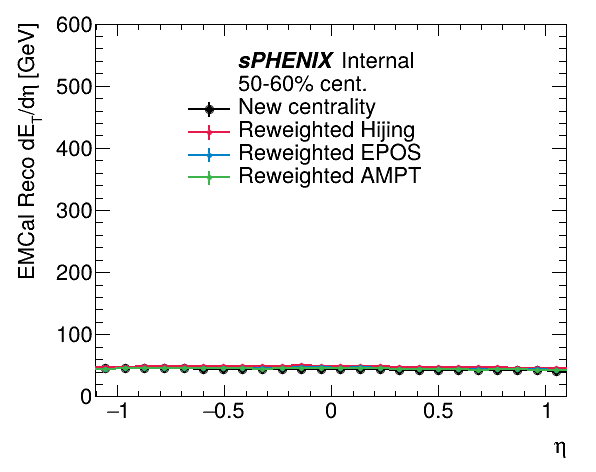

In [165]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.6,.7,.89)
if cent == '0-5' or cent == '5-10':
    leg = ROOT.TLegend(.3,.2,.7,.49)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_eT_data_emcal,"New centrality","lep")
leg.AddEntry(h_eT_sim_emcal,"Reweighted Hijing","lep")
leg.AddEntry(h_eT_epos_emcal,"Reweighted EPOS","lep")
leg.AddEntry(h_eT_ampt_emcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_emcal.SetLineColor(1)
h_eT_sim_emcal.SetLineColor(colors[0])
h_eT_ampt_emcal.SetLineColor(colors[1])
h_eT_epos_emcal.SetLineColor(colors[3])
h_eT_data_emcal.SetMarkerStyle(20)
h_eT_sim_emcal.SetMarkerStyle(8)
h_eT_sim_emcal.SetMarkerSize(0.7)
h_eT_sim_emcal.SetMarkerColor(colors[0])
h_eT_ampt_emcal.SetMarkerStyle(8)
h_eT_ampt_emcal.SetMarkerSize(0.7)
h_eT_ampt_emcal.SetMarkerColor(colors[1])
h_eT_epos_emcal.SetMarkerStyle(8)
h_eT_epos_emcal.SetMarkerSize(0.7)
h_eT_epos_emcal.SetMarkerColor(colors[3])
h_eT_data_emcal.GetYaxis().SetRangeUser(0,600)
h_eT_data_emcal.SetStats(0)
h_eT_sim_emcal.SetStats(0)
h_eT_epos_emcal.SetStats(0)
h_eT_ampt_emcal.SetStats(0)
h_eT_data_emcal.SetYTitle("EMCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_emcal.SetXTitle("#eta")
h_eT_data_emcal.Draw()
h_eT_sim_emcal.Draw('same')
h_eT_epos_emcal.Draw('same')
h_eT_ampt_emcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_reco_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/ihcal_reco_50-60.png has been created


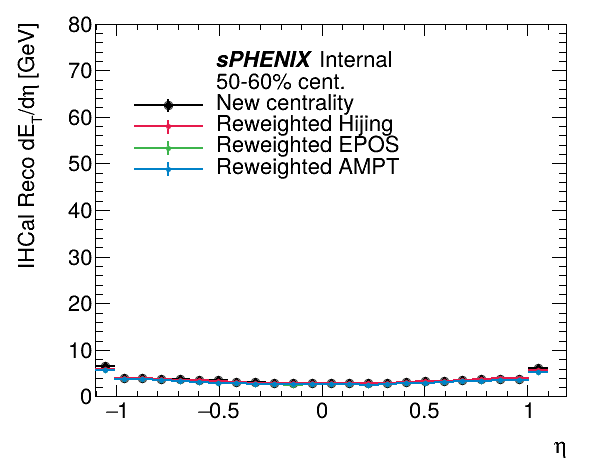

In [166]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.2,.62,.85,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_eT_data_ihcal,"New centrality","lep")
leg.AddEntry(h_eT_sim_ihcal,"Reweighted Hijing","lep")
leg.AddEntry(h_eT_epos_ihcal,"Reweighted EPOS","lep")
leg.AddEntry(h_eT_ampt_ihcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_ihcal.SetStats(0)
h_eT_sim_ihcal.SetStats(0)
h_eT_epos_ihcal.SetStats(0)
h_eT_ampt_ihcal.SetStats(0)
h_eT_data_ihcal.SetYTitle("IHCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_ihcal.SetXTitle("#eta")
h_eT_data_ihcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_sim_ihcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_epos_ihcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_ampt_ihcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_data_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_sim_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_epos_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_ampt_ihcal.GetYaxis().SetRangeUser(0,80)
h_eT_data_ihcal.SetLineColor(1)
h_eT_sim_ihcal.SetLineColor(colors[0])
h_eT_epos_ihcal.SetLineColor(colors[1])
h_eT_ampt_ihcal.SetLineColor(colors[3])
h_eT_data_ihcal.SetMarkerStyle(20)
h_eT_sim_ihcal.SetMarkerStyle(8)
h_eT_sim_ihcal.SetMarkerSize(0.7)
h_eT_sim_ihcal.SetMarkerColor(colors[0])
h_eT_ampt_ihcal.SetMarkerStyle(8)
h_eT_ampt_ihcal.SetMarkerSize(0.7)
h_eT_ampt_ihcal.SetMarkerColor(colors[3])
h_eT_epos_ihcal.SetMarkerStyle(8)
h_eT_epos_ihcal.SetMarkerSize(0.7)
h_eT_epos_ihcal.SetMarkerColor(colors[1])
h_eT_data_ihcal.Draw()
h_eT_sim_ihcal.Draw('same')
h_eT_epos_ihcal.Draw('same')
h_eT_ampt_ihcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ihcal_reco_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/ohcal_reco_50-60.png has been created


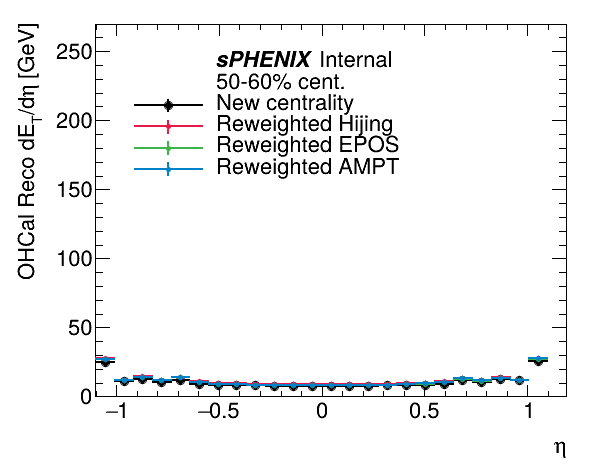

In [167]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.2,.62,.85,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_eT_data_ohcal,"New centrality","lep")
leg.AddEntry(h_eT_sim_ohcal,"Reweighted Hijing","lep")
leg.AddEntry(h_eT_epos_ohcal,"Reweighted EPOS","lep")
leg.AddEntry(h_eT_ampt_ohcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_ohcal.SetStats(0)
h_eT_sim_ohcal.SetStats(0)
h_eT_epos_ohcal.SetStats(0)
h_eT_ampt_ohcal.SetStats(0)
h_eT_data_ohcal.SetYTitle("OHCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_ohcal.SetXTitle("#eta")
h_eT_data_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_sim_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_epos_ohcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_epos_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_ampt_ohcal.GetYaxis().SetRangeUser(0,270)
h_eT_data_ohcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_sim_ohcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_ampt_ohcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_data_ohcal.SetLineColor(1)
h_eT_sim_ohcal.SetLineColor(colors[0])
h_eT_epos_ohcal.SetLineColor(colors[1])
h_eT_ampt_ohcal.SetLineColor(colors[3])
h_eT_data_ohcal.SetMarkerStyle(20)
h_eT_sim_ohcal.SetMarkerStyle(8)
h_eT_sim_ohcal.SetMarkerSize(0.7)
h_eT_sim_ohcal.SetMarkerColor(colors[0])
h_eT_ampt_ohcal.SetMarkerStyle(8)
h_eT_ampt_ohcal.SetMarkerSize(0.7)
h_eT_ampt_ohcal.SetMarkerColor(colors[3])
h_eT_epos_ohcal.SetMarkerStyle(8)
h_eT_epos_ohcal.SetMarkerSize(0.7)
h_eT_epos_ohcal.SetMarkerColor(colors[1])
h_eT_data_ohcal.Draw()
h_eT_sim_ohcal.Draw('same')
h_eT_epos_ohcal.Draw('same')
h_eT_ampt_ohcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ohcal_reco_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/calo_reco_50-60.png has been created


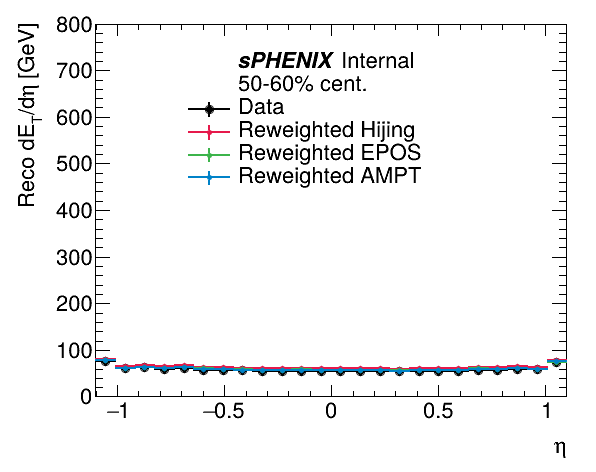

In [168]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.3,.6,.7,.89)
if cent == '0-5' or cent == '5-10':
    leg = ROOT.TLegend(.3,.2,.7,.49)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_eT_data_calo,"Data","lep")
leg.AddEntry(h_eT_sim_calo,"Reweighted Hijing","lep")
leg.AddEntry(h_eT_epos_calo,"Reweighted EPOS","lep")
leg.AddEntry(h_eT_ampt_calo,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_calo.SetLineColor(1)
h_eT_sim_calo.SetLineColor(colors[0])
h_eT_ampt_calo.SetLineColor(colors[3])
h_eT_epos_calo.SetLineColor(colors[1])
h_eT_data_calo.SetMarkerStyle(20)
h_eT_sim_calo.SetMarkerStyle(8)
h_eT_sim_calo.SetMarkerSize(0.7)
h_eT_sim_calo.SetMarkerColor(colors[0])
h_eT_ampt_calo.SetMarkerStyle(8)
h_eT_ampt_calo.SetMarkerSize(0.7)
h_eT_ampt_calo.SetMarkerColor(colors[3])
h_eT_epos_calo.SetMarkerStyle(8)
h_eT_epos_calo.SetMarkerSize(0.7)
h_eT_epos_calo.SetMarkerColor(colors[1])
h_eT_data_calo.GetYaxis().SetRangeUser(0,800)
h_eT_data_calo.SetStats(0)
h_eT_sim_calo.SetStats(0)
h_eT_epos_calo.SetStats(0)
h_eT_ampt_calo.SetStats(0)
h_eT_data_calo.SetYTitle("Reco dE_{T}/d#eta [GeV]")
h_eT_data_calo.SetXTitle("#eta")
h_eT_data_calo.Draw()
h_eT_sim_calo.Draw('same')
h_eT_epos_calo.Draw('same')
h_eT_ampt_calo.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/calo_reco_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/hcal_reco_50-60.png has been created


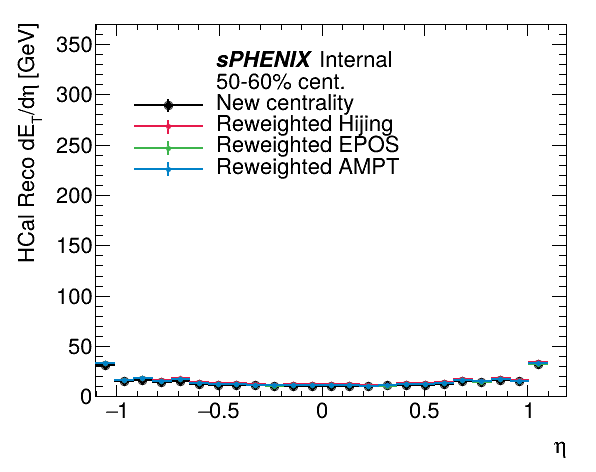

In [169]:
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.2,.62,.85,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry(h_eT_data_hcal,"New centrality","lep")
leg.AddEntry(h_eT_sim_hcal,"Reweighted Hijing","lep")
leg.AddEntry(h_eT_epos_hcal,"Reweighted EPOS","lep")
leg.AddEntry(h_eT_ampt_hcal,"Reweighted AMPT","lep")
leg.SetBorderSize(0)
h_eT_data_hcal.SetStats(0)
h_eT_sim_hcal.SetStats(0)
h_eT_epos_hcal.SetStats(0)
h_eT_ampt_hcal.SetStats(0)
h_eT_data_hcal.SetYTitle("HCal Reco dE_{T}/d#eta [GeV]")
h_eT_data_hcal.SetXTitle("#eta")
h_eT_data_hcal.GetYaxis().SetRangeUser(0,370)
h_eT_sim_hcal.GetYaxis().SetRangeUser(0,370)
h_eT_epos_hcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_epos_hcal.GetYaxis().SetRangeUser(0,370)
h_eT_ampt_hcal.GetYaxis().SetRangeUser(0,370)
h_eT_data_hcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_sim_hcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_ampt_hcal.GetXaxis().SetRangeUser(-1.1,1.1)
h_eT_data_hcal.SetLineColor(1)
h_eT_sim_hcal.SetLineColor(colors[0])
h_eT_epos_hcal.SetLineColor(colors[1])
h_eT_ampt_hcal.SetLineColor(colors[3])
h_eT_data_hcal.SetMarkerStyle(20)
h_eT_sim_hcal.SetMarkerStyle(8)
h_eT_sim_hcal.SetMarkerSize(0.7)
h_eT_sim_hcal.SetMarkerColor(colors[0])
h_eT_ampt_hcal.SetMarkerStyle(8)
h_eT_ampt_hcal.SetMarkerSize(0.7)
h_eT_ampt_hcal.SetMarkerColor(colors[3])
h_eT_epos_hcal.SetMarkerStyle(8)
h_eT_epos_hcal.SetMarkerSize(0.7)
h_eT_epos_hcal.SetMarkerColor(colors[1])
h_eT_data_hcal.Draw()
h_eT_sim_hcal.Draw('same')
h_eT_epos_hcal.Draw('same')
h_eT_ampt_hcal.Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/hcal_reco_'+cent+'.png')

In [170]:
emcal_ratio_hijing = TH1F(h_eT_sim_emcal.Clone("emcal_ratio_hijing"))
emcal_ratio_hijing.Divide(h_eT_truth)
emcal_detdeta_hijing = TH1F(h_eT_data_emcal.Clone("emcal_detdeta_hijing"))
emcal_detdeta_hijing.Divide(emcal_ratio_hijing)
emcal_ratio_epos = TH1F(h_eT_epos_emcal.Clone("emcal_ratio_epos"))
emcal_ratio_epos.Divide(h_eT_truth_epos)
emcal_detdeta_epos = TH1F(h_eT_data_emcal.Clone("emcal_detdeta_epos"))
emcal_detdeta_epos.Divide(emcal_ratio_epos)
emcal_ratio_ampt = TH1F(h_eT_ampt_emcal.Clone("emcal_ratio_ampt"))
emcal_ratio_ampt.Divide(h_eT_truth_ampt)
emcal_detdeta_ampt = TH1F(h_eT_data_emcal.Clone("emcal_detdeta_ampt"))
emcal_detdeta_ampt.Divide(emcal_ratio_ampt)

ihcal_ratio_hijing = TH1F(h_eT_sim_ihcal.Clone("ihcal_ratio_hijing"))
ihcal_ratio_hijing.Divide(h_eT_truth_ihcalbin)
ihcal_detdeta_hijing = TH1F(h_eT_data_ihcal.Clone("ihcal_detdeta_hijing"))
ihcal_detdeta_hijing.Divide(ihcal_ratio_hijing)
ihcal_ratio_epos = TH1F(h_eT_epos_ihcal.Clone("ihcal_ratio_epos"))
ihcal_ratio_epos.Divide(h_eT_truth_ihcalbin_epos)
ihcal_detdeta_epos = TH1F(h_eT_data_ihcal.Clone("ihcal_detdeta_epos"))
ihcal_detdeta_epos.Divide(ihcal_ratio_epos)
ihcal_ratio_ampt = TH1F(h_eT_ampt_ihcal.Clone("ihcal_ratio_ampt"))
ihcal_ratio_ampt.Divide(h_eT_truth_ihcalbin_ampt)
ihcal_detdeta_ampt = TH1F(h_eT_data_ihcal.Clone("ihcal_detdeta_ampt"))
ihcal_detdeta_ampt.Divide(ihcal_ratio_ampt)

ohcal_ratio_hijing = TH1F(h_eT_sim_ohcal.Clone("ohcal_ratio_hijing"))
ohcal_ratio_hijing.Divide(h_eT_truth_ohcalbin)
ohcal_detdeta_hijing = TH1F(h_eT_data_ohcal.Clone("ohcal_detdeta_hijing"))
ohcal_detdeta_hijing.Divide(ohcal_ratio_hijing)
ohcal_ratio_epos = TH1F(h_eT_epos_ohcal.Clone("ohcal_ratio_epos"))
ohcal_ratio_epos.Divide(h_eT_truth_ohcalbin_epos)
ohcal_detdeta_epos = TH1F(h_eT_data_ohcal.Clone("ohcal_detdeta_epos"))
ohcal_detdeta_epos.Divide(ohcal_ratio_epos)
ohcal_ratio_ampt = TH1F(h_eT_ampt_ohcal.Clone("ohcal_ratio_ampt"))
ohcal_ratio_ampt.Divide(h_eT_truth_ohcalbin_ampt)
ohcal_detdeta_ampt = TH1F(h_eT_data_ohcal.Clone("ohcal_detdeta_ampt"))
ohcal_detdeta_ampt.Divide(ohcal_ratio_ampt)

calo_ratio_hijing = TH1F(h_eT_sim_calo.Clone("calo_ratio_hijing"))
calo_ratio_hijing.Divide(h_eT_truth_calobin)
calo_detdeta_hijing = TH1F(h_eT_data_calo.Clone("calo_detdeta_hijing"))
calo_detdeta_hijing.Divide(calo_ratio_hijing)
calo_ratio_epos = TH1F(h_eT_epos_calo.Clone("calo_ratio_epos"))
calo_ratio_epos.Divide(h_eT_truth_calobin_epos)
calo_detdeta_epos = TH1F(h_eT_data_calo.Clone("calo_detdeta_epos"))
calo_detdeta_epos.Divide(calo_ratio_epos)
calo_ratio_ampt = TH1F(h_eT_ampt_calo.Clone("calo_ratio_ampt"))
calo_ratio_ampt.Divide(h_eT_truth_calobin_ampt)
calo_detdeta_ampt = TH1F(h_eT_data_calo.Clone("calo_detdeta_ampt"))
calo_detdeta_ampt.Divide(calo_ratio_ampt)

hcal_ratio_hijing = TH1F(h_eT_sim_hcal.Clone("hcal_ratio_hijing"))
hcal_ratio_hijing.Divide(h_eT_truth_hcalbin)
hcal_detdeta_hijing = TH1F(h_eT_data_hcal.Clone("hcal_detdeta_hijing"))
hcal_detdeta_hijing.Divide(hcal_ratio_hijing)
hcal_ratio_epos = TH1F(h_eT_epos_hcal.Clone("hcal_ratio_epos"))
hcal_ratio_epos.Divide(h_eT_truth_hcalbin_epos)
hcal_detdeta_epos = TH1F(h_eT_data_hcal.Clone("hcal_detdeta_epos"))
hcal_detdeta_epos.Divide(hcal_ratio_epos)
hcal_ratio_ampt = TH1F(h_eT_ampt_hcal.Clone("hcal_ratio_ampt"))
hcal_ratio_ampt.Divide(h_eT_truth_hcalbin_ampt)
hcal_detdeta_ampt = TH1F(h_eT_data_hcal.Clone("hcal_detdeta_ampt"))
hcal_detdeta_ampt.Divide(hcal_ratio_ampt)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: emcal_corr
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/emcal_correction_factor_50-60.png has been created


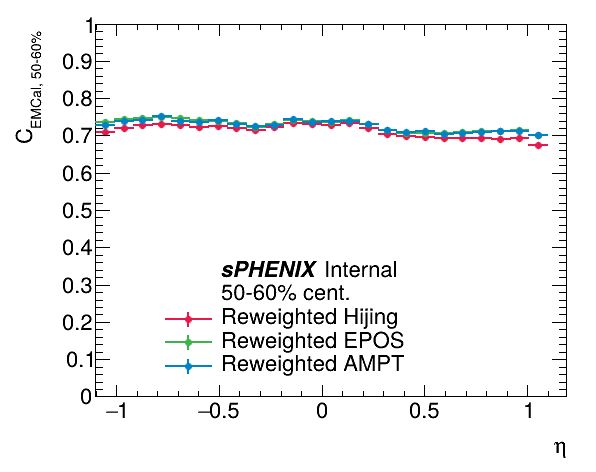

In [171]:
emcal_corr_canvas = TCanvas("emcal_corr","",600,500)
emcal_corr_leg = ROOT.TLegend(.26,.2,.7,.45)
emcal_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
emcal_corr_leg.AddEntry("",f"{cent}% cent.","")
emcal_corr_leg.AddEntry(emcal_ratio_hijing,"Reweighted Hijing","lep")
emcal_corr_leg.AddEntry(emcal_ratio_epos,"Reweighted EPOS","lep")
emcal_corr_leg.AddEntry(emcal_ratio_ampt,"Reweighted AMPT","lep")
emcal_corr_leg.SetBorderSize(0)
emcal_ratio_hijing.SetMarkerSize(0.8)
emcal_ratio_epos.SetMarkerSize(0.8)
emcal_ratio_ampt.SetMarkerSize(0.8)
emcal_ratio_hijing.SetMarkerStyle(20)
emcal_ratio_hijing.SetLineColor(colors[0])
emcal_ratio_hijing.SetMarkerColor(colors[0])
emcal_ratio_epos.SetMarkerStyle(20)
emcal_ratio_epos.SetLineColor(colors[1])
emcal_ratio_epos.SetMarkerColor(colors[1])
emcal_ratio_ampt.SetMarkerStyle(20)
emcal_ratio_ampt.SetLineColor(colors[3])
emcal_ratio_ampt.SetMarkerColor(colors[3])
emcal_ratio_hijing.GetYaxis().SetRangeUser(0,1)
emcal_ratio_epos.GetYaxis().SetRangeUser(0,1)
emcal_ratio_ampt.GetYaxis().SetRangeUser(0,1)
emcal_ratio_hijing.GetXaxis().SetRangeUser(-1.1,1.1)
emcal_ratio_epos.GetXaxis().SetRangeUser(-1.1,1.1)
emcal_ratio_ampt.GetXaxis().SetRangeUser(-1.1,1.1)
emcal_ratio_hijing.SetStats(0)
emcal_ratio_epos.SetStats(0)
emcal_ratio_ampt.SetStats(0)
emcal_ratio_hijing.SetYTitle("C_{EMCal, "+cent+"%}")
emcal_ratio_hijing.SetXTitle("#eta")
emcal_ratio_hijing.Draw()
emcal_ratio_epos.Draw("same")
emcal_ratio_ampt.Draw("same")
emcal_corr_leg.Draw()
emcal_corr_canvas.Draw()
emcal_corr_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/emcal_correction_factor_'+cent+'.png')                

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ihcal_corr
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/ihcal_correction_factor_50-60.png has been created


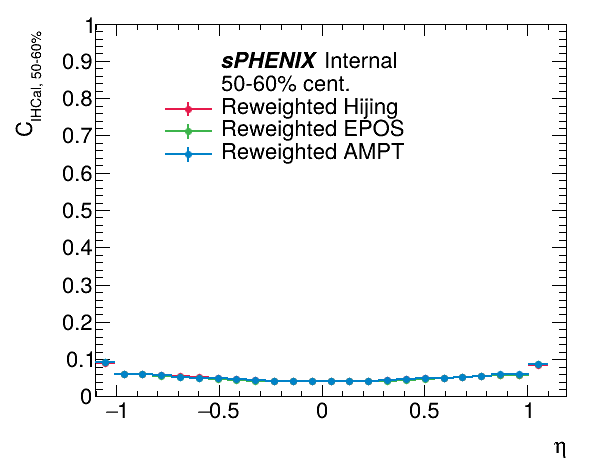

In [172]:
ihcal_corr_canvas = TCanvas("ihcal_corr","",600,500)
ihcal_corr_leg = ROOT.TLegend(.26,.65,.7,.89)
ihcal_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
ihcal_corr_leg.AddEntry("",f"{cent}% cent.","")
ihcal_corr_leg.AddEntry(ihcal_ratio_hijing,"Reweighted Hijing","lep")
ihcal_corr_leg.AddEntry(ihcal_ratio_epos,"Reweighted EPOS","lep")
ihcal_corr_leg.AddEntry(ihcal_ratio_ampt,"Reweighted AMPT","lep")
ihcal_corr_leg.SetBorderSize(0)
ihcal_ratio_hijing.SetMarkerSize(0.8)
ihcal_ratio_epos.SetMarkerSize(0.8)
ihcal_ratio_ampt.SetMarkerSize(0.8)
ihcal_ratio_hijing.SetMarkerStyle(20)
ihcal_ratio_hijing.SetLineColor(colors[0])
ihcal_ratio_hijing.SetMarkerColor(colors[0])
ihcal_ratio_epos.SetMarkerStyle(20)
ihcal_ratio_epos.SetLineColor(colors[1])
ihcal_ratio_epos.SetMarkerColor(colors[1])
ihcal_ratio_ampt.SetMarkerStyle(20)
ihcal_ratio_ampt.SetLineColor(colors[3])
ihcal_ratio_ampt.SetMarkerColor(colors[3])
ihcal_ratio_hijing.GetYaxis().SetRangeUser(0,1)
ihcal_ratio_epos.GetYaxis().SetRangeUser(0,1)
ihcal_ratio_ampt.GetYaxis().SetRangeUser(0,1)
ihcal_ratio_hijing.GetXaxis().SetRangeUser(-1.1,1.1)
ihcal_ratio_epos.GetXaxis().SetRangeUser(-1.1,1.1)
ihcal_ratio_ampt.GetXaxis().SetRangeUser(-1.1,1.1)
ihcal_ratio_hijing.SetStats(0)
ihcal_ratio_epos.SetStats(0)
ihcal_ratio_ampt.SetStats(0)
ihcal_ratio_hijing.SetYTitle("C_{IHCal, "+cent+"%}")
ihcal_ratio_hijing.SetXTitle("#eta")
ihcal_ratio_hijing.Draw()
ihcal_ratio_epos.Draw("same")
ihcal_ratio_ampt.Draw("same")
ihcal_corr_leg.Draw()
ihcal_corr_canvas.Draw()
ihcal_corr_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ihcal_correction_factor_'+cent+'.png')                

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ohcal_corr
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/ohcal_correction_factor_50-60.png has been created


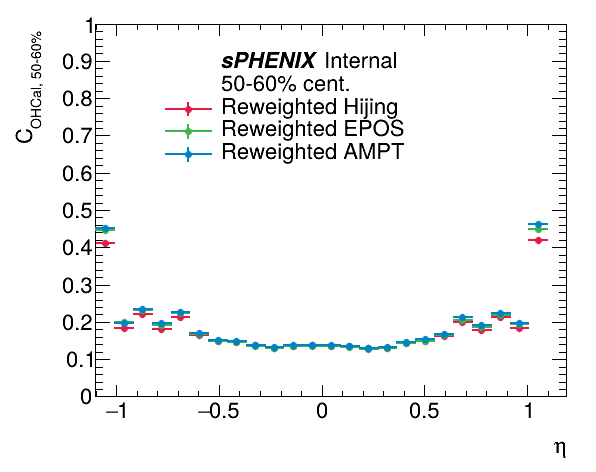

In [173]:
ohcal_corr_canvas = TCanvas("ohcal_corr","",600,500)
ohcal_corr_leg = ROOT.TLegend(.26,.65,.7,.89)
ohcal_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
ohcal_corr_leg.AddEntry("",f"{cent}% cent.","")
ohcal_corr_leg.AddEntry(ohcal_ratio_hijing,"Reweighted Hijing","lep")
ohcal_corr_leg.AddEntry(ohcal_ratio_epos,"Reweighted EPOS","lep")
ohcal_corr_leg.AddEntry(ohcal_ratio_ampt,"Reweighted AMPT","lep")
ohcal_corr_leg.SetBorderSize(0)
ohcal_ratio_hijing.SetMarkerSize(0.8)
ohcal_ratio_epos.SetMarkerSize(0.8)
ohcal_ratio_ampt.SetMarkerSize(0.8)
ohcal_ratio_hijing.SetMarkerStyle(20)
ohcal_ratio_hijing.SetLineColor(colors[0])
ohcal_ratio_hijing.SetMarkerColor(colors[0])
ohcal_ratio_epos.SetMarkerStyle(20)
ohcal_ratio_epos.SetLineColor(colors[1])
ohcal_ratio_epos.SetMarkerColor(colors[1])
ohcal_ratio_ampt.SetMarkerStyle(20)
ohcal_ratio_ampt.SetLineColor(colors[3])
ohcal_ratio_ampt.SetMarkerColor(colors[3])
ohcal_ratio_hijing.GetYaxis().SetRangeUser(0,1)
ohcal_ratio_epos.GetYaxis().SetRangeUser(0,1)
ohcal_ratio_ampt.GetYaxis().SetRangeUser(0,1)
ohcal_ratio_hijing.GetXaxis().SetRangeUser(-1.1,1.1)
ohcal_ratio_epos.GetXaxis().SetRangeUser(-1.1,1.1)
ohcal_ratio_ampt.GetXaxis().SetRangeUser(-1.1,1.1)
ohcal_ratio_hijing.SetStats(0)
ohcal_ratio_epos.SetStats(0)
ohcal_ratio_ampt.SetStats(0)
ohcal_ratio_hijing.SetYTitle("C_{OHCal, "+cent+"%}")
ohcal_ratio_hijing.SetXTitle("#eta")
ohcal_ratio_hijing.Draw()
ohcal_ratio_epos.Draw("same")
ohcal_ratio_ampt.Draw("same")
ohcal_corr_leg.Draw()
ohcal_corr_canvas.Draw()
ohcal_corr_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/ohcal_correction_factor_'+cent+'.png')             

Warning in <TCanvas::Constructor>: Deleting canvas with same name: calo_corr
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/calo_correction_factor_50-60.png has been created


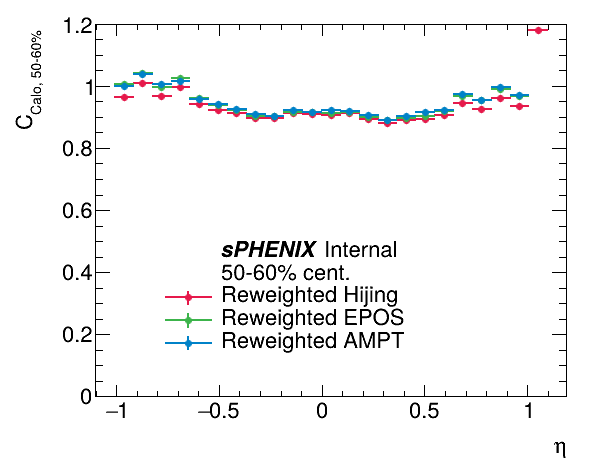

In [174]:
calo_corr_canvas = TCanvas("calo_corr","",600,500)
calo_corr_leg = ROOT.TLegend(.26,.25,.7,.49)
calo_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
calo_corr_leg.AddEntry("",f"{cent}% cent.","")
calo_corr_leg.AddEntry(calo_ratio_hijing,"Reweighted Hijing","lep")
calo_corr_leg.AddEntry(calo_ratio_epos,"Reweighted EPOS","lep")
calo_corr_leg.AddEntry(calo_ratio_ampt,"Reweighted AMPT","lep")
calo_corr_leg.SetBorderSize(0)
calo_ratio_hijing.SetMarkerSize(0.8)
calo_ratio_epos.SetMarkerSize(0.8)
calo_ratio_ampt.SetMarkerSize(0.8)
calo_ratio_hijing.SetMarkerStyle(20)
calo_ratio_hijing.SetLineColor(colors[0])
calo_ratio_hijing.SetMarkerColor(colors[0])
calo_ratio_epos.SetMarkerStyle(20)
calo_ratio_epos.SetLineColor(colors[1])
calo_ratio_epos.SetMarkerColor(colors[1])
calo_ratio_ampt.SetMarkerStyle(20)
calo_ratio_ampt.SetLineColor(colors[3])
calo_ratio_ampt.SetMarkerColor(colors[3])
calo_ratio_hijing.GetYaxis().SetRangeUser(0,1.2)
calo_ratio_epos.GetYaxis().SetRangeUser(0,1.2)
calo_ratio_ampt.GetYaxis().SetRangeUser(0,1.2)
calo_ratio_hijing.GetXaxis().SetRangeUser(-1.1,1.1)
calo_ratio_epos.GetXaxis().SetRangeUser(-1.1,1.1)
calo_ratio_ampt.GetXaxis().SetRangeUser(-1.1,1.1)
calo_ratio_hijing.SetStats(0)
calo_ratio_epos.SetStats(0)
calo_ratio_ampt.SetStats(0)
calo_ratio_hijing.SetYTitle("C_{Calo, "+cent+"%}")
calo_ratio_hijing.SetXTitle("#eta")
calo_ratio_hijing.Draw()
calo_ratio_epos.Draw("same")
calo_ratio_ampt.Draw("same")
calo_corr_leg.Draw()
calo_corr_canvas.Draw()
calo_corr_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/calo_correction_factor_'+cent+'.png')             

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hcal_corr
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/hcal_correction_factor_50-60.png has been created


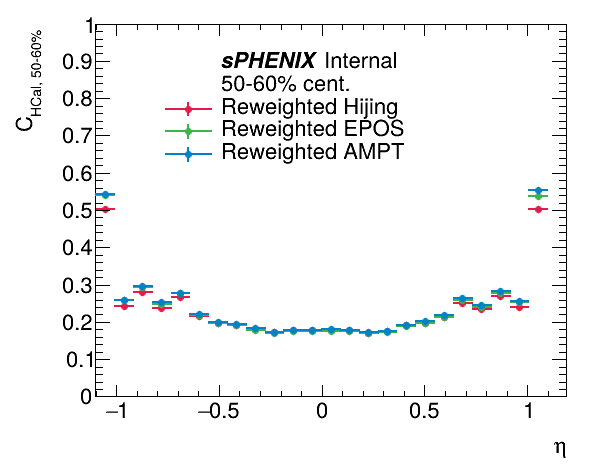

In [175]:
hcal_corr_canvas = TCanvas("hcal_corr","",600,500)
hcal_corr_leg = ROOT.TLegend(.26,.65,.7,.89)
hcal_corr_leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
hcal_corr_leg.AddEntry("",f"{cent}% cent.","")
hcal_corr_leg.AddEntry(hcal_ratio_hijing,"Reweighted Hijing","lep")
hcal_corr_leg.AddEntry(hcal_ratio_epos,"Reweighted EPOS","lep")
hcal_corr_leg.AddEntry(hcal_ratio_ampt,"Reweighted AMPT","lep")
hcal_corr_leg.SetBorderSize(0)
hcal_ratio_hijing.SetMarkerSize(0.8)
hcal_ratio_epos.SetMarkerSize(0.8)
hcal_ratio_ampt.SetMarkerSize(0.8)
hcal_ratio_hijing.SetMarkerStyle(20)
hcal_ratio_hijing.SetLineColor(colors[0])
hcal_ratio_hijing.SetMarkerColor(colors[0])
hcal_ratio_epos.SetMarkerStyle(20)
hcal_ratio_epos.SetLineColor(colors[1])
hcal_ratio_epos.SetMarkerColor(colors[1])
hcal_ratio_ampt.SetMarkerStyle(20)
hcal_ratio_ampt.SetLineColor(colors[3])
hcal_ratio_ampt.SetMarkerColor(colors[3])
hcal_ratio_hijing.GetYaxis().SetRangeUser(0,1)
hcal_ratio_epos.GetYaxis().SetRangeUser(0,1)
hcal_ratio_ampt.GetYaxis().SetRangeUser(0,1)
hcal_ratio_hijing.GetXaxis().SetRangeUser(-1.1,1.1)
hcal_ratio_epos.GetXaxis().SetRangeUser(-1.1,1.1)
hcal_ratio_ampt.GetXaxis().SetRangeUser(-1.1,1.1)
hcal_ratio_hijing.SetStats(0)
hcal_ratio_epos.SetStats(0)
hcal_ratio_ampt.SetStats(0)
hcal_ratio_hijing.SetYTitle("C_{HCal, "+cent+"%}")
hcal_ratio_hijing.SetXTitle("#eta")
hcal_ratio_hijing.Draw()
hcal_ratio_epos.Draw("same")
hcal_ratio_ampt.Draw("same")
hcal_corr_leg.Draw()
hcal_corr_canvas.Draw()
hcal_corr_canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/hcal_correction_factor_'+cent+'.png')             

In [176]:
emcal_detdeta_hijing.Rebin(4)
emcal_detdeta_hijing.Scale(1.0/4)
ihcal_detdeta_hijing.Rebin(4)
ihcal_detdeta_hijing.Scale(1.0/4)
ohcal_detdeta_hijing.Rebin(4)
ohcal_detdeta_hijing.Scale(1.0/4)
calo_detdeta_hijing.Rebin(4)
calo_detdeta_hijing.Scale(1.0/4)
hcal_detdeta_hijing.Rebin(4)
hcal_detdeta_hijing.Scale(1.0/4)

emcal_detdeta_epos.Rebin(4)
emcal_detdeta_epos.Scale(1.0/4)
ihcal_detdeta_epos.Rebin(4)
ihcal_detdeta_epos.Scale(1.0/4)
ohcal_detdeta_epos.Rebin(4)
ohcal_detdeta_epos.Scale(1.0/4)
calo_detdeta_epos.Rebin(4)
calo_detdeta_epos.Scale(1.0/4)
hcal_detdeta_epos.Rebin(4)
hcal_detdeta_epos.Scale(1.0/4)

emcal_detdeta_ampt.Rebin(4)
emcal_detdeta_ampt.Scale(1.0/4)
ihcal_detdeta_ampt.Rebin(4)
ihcal_detdeta_ampt.Scale(1.0/4)
ohcal_detdeta_ampt.Rebin(4)
ohcal_detdeta_ampt.Scale(1.0/4)
calo_detdeta_ampt.Rebin(4)
calo_detdeta_ampt.Scale(1.0/4)
hcal_detdeta_ampt.Rebin(4)
hcal_detdeta_ampt.Scale(1.0/4)

emcal_unc.Rebin(4)
emcal_unc.Scale(1.0/4)
ihcal_unc.Rebin(4)
ihcal_unc.Scale(1.0/4)
ohcal_unc.Rebin(4)
ohcal_unc.Scale(1.0/4)
calo_unc.Rebin(4)
calo_unc.Scale(1.0/4)
hcal_unc.Rebin(4)
hcal_unc.Scale(1.0/4)

In [177]:
emcal_hijing_errors = ROOT.TGraphErrors()
emcal_epos_errors = ROOT.TGraphErrors()
emcal_ampt_errors = ROOT.TGraphErrors()
for i in range(emcal_detdeta_hijing.GetNbinsX()):
    error = emcal_unc.GetBinContent(i + 1)
    x = emcal_detdeta_hijing.GetBinCenter(i + 1)
    y = emcal_detdeta_hijing.GetBinContent(i + 1)
    bin_width = emcal_detdeta_hijing.GetBinWidth(i + 1)
    emcal_hijing_errors.SetPoint(i, x, y)
    emcal_hijing_errors.SetPointError(i, bin_width/2, error) 
    x = emcal_detdeta_epos.GetBinCenter(i + 1)
    y = emcal_detdeta_epos.GetBinContent(i + 1)
    bin_width = emcal_detdeta_epos.GetBinWidth(i + 1)
    emcal_epos_errors.SetPoint(i, x, y)
    emcal_epos_errors.SetPointError(i, bin_width/2, error) 
    x = emcal_detdeta_ampt.GetBinCenter(i + 1)
    y = emcal_detdeta_ampt.GetBinContent(i + 1)
    bin_width = emcal_detdeta_ampt.GetBinWidth(i + 1)
    emcal_ampt_errors.SetPoint(i, x, y)
    emcal_ampt_errors.SetPointError(i, bin_width/2, error) 
    
ihcal_hijing_errors = ROOT.TGraphErrors()
ihcal_epos_errors = ROOT.TGraphErrors()
ihcal_ampt_errors = ROOT.TGraphErrors()
for i in range(ihcal_detdeta_hijing.GetNbinsX()):
    error = ihcal_unc.GetBinContent(i + 1)
    x = ihcal_detdeta_hijing.GetBinCenter(i + 1)
    y = ihcal_detdeta_hijing.GetBinContent(i + 1)
    bin_width = ihcal_detdeta_hijing.GetBinWidth(i + 1)
    ihcal_hijing_errors.SetPoint(i, x, y)
    ihcal_hijing_errors.SetPointError(i, bin_width/2, error) 
    x = ihcal_detdeta_epos.GetBinCenter(i + 1)
    y = ihcal_detdeta_epos.GetBinContent(i + 1)
    bin_width = ihcal_detdeta_epos.GetBinWidth(i + 1)
    ihcal_epos_errors.SetPoint(i, x, y)
    ihcal_epos_errors.SetPointError(i, bin_width/2, error) 
    x = ihcal_detdeta_ampt.GetBinCenter(i + 1)
    y = ihcal_detdeta_ampt.GetBinContent(i + 1)
    bin_width = ihcal_detdeta_ampt.GetBinWidth(i + 1)
    ihcal_ampt_errors.SetPoint(i, x, y)
    ihcal_ampt_errors.SetPointError(i, bin_width/2, error) 
    
ohcal_hijing_errors = ROOT.TGraphErrors()
ohcal_epos_errors = ROOT.TGraphErrors()
ohcal_ampt_errors = ROOT.TGraphErrors()
for i in range(ohcal_detdeta_hijing.GetNbinsX()):
    error = ohcal_unc.GetBinContent(i + 1)
    x = ohcal_detdeta_hijing.GetBinCenter(i + 1)
    y = ohcal_detdeta_hijing.GetBinContent(i + 1)
    bin_width = ohcal_detdeta_hijing.GetBinWidth(i + 1)
    ohcal_hijing_errors.SetPoint(i, x, y)
    ohcal_hijing_errors.SetPointError(i, bin_width/2, error) 
    x = ohcal_detdeta_epos.GetBinCenter(i + 1)
    y = ohcal_detdeta_epos.GetBinContent(i + 1)
    bin_width = ohcal_detdeta_epos.GetBinWidth(i + 1)
    ohcal_epos_errors.SetPoint(i, x, y)
    ohcal_epos_errors.SetPointError(i, bin_width/2, error) 
    x = ohcal_detdeta_ampt.GetBinCenter(i + 1)
    y = ohcal_detdeta_ampt.GetBinContent(i + 1)
    bin_width = ohcal_detdeta_ampt.GetBinWidth(i + 1)
    ohcal_ampt_errors.SetPoint(i, x, y)
    ohcal_ampt_errors.SetPointError(i, bin_width/2, error) 
    
calo_hijing_errors = ROOT.TGraphErrors()
calo_epos_errors = ROOT.TGraphErrors()
calo_ampt_errors = ROOT.TGraphErrors()
for i in range(calo_detdeta_hijing.GetNbinsX()):
    error = calo_unc.GetBinContent(i + 1)
    x = calo_detdeta_hijing.GetBinCenter(i + 1)
    y = calo_detdeta_hijing.GetBinContent(i + 1)
    bin_width = calo_detdeta_hijing.GetBinWidth(i + 1)
    calo_hijing_errors.SetPoint(i, x, y)
    calo_hijing_errors.SetPointError(i, bin_width/2, error) 
    x = calo_detdeta_epos.GetBinCenter(i + 1)
    y = calo_detdeta_epos.GetBinContent(i + 1)
    bin_width = calo_detdeta_epos.GetBinWidth(i + 1)
    calo_epos_errors.SetPoint(i, x, y)
    calo_epos_errors.SetPointError(i, bin_width/2, error) 
    x = calo_detdeta_ampt.GetBinCenter(i + 1)
    y = calo_detdeta_ampt.GetBinContent(i + 1)
    bin_width = calo_detdeta_ampt.GetBinWidth(i + 1)
    calo_ampt_errors.SetPoint(i, x, y)
    calo_ampt_errors.SetPointError(i, bin_width/2, error) 
    
hcal_hijing_errors = ROOT.TGraphErrors()
hcal_epos_errors = ROOT.TGraphErrors()
hcal_ampt_errors = ROOT.TGraphErrors()
for i in range(hcal_detdeta_hijing.GetNbinsX()):
    error = hcal_unc.GetBinContent(i + 1)
    x = hcal_detdeta_hijing.GetBinCenter(i + 1)
    y = hcal_detdeta_hijing.GetBinContent(i + 1)
    bin_width = hcal_detdeta_hijing.GetBinWidth(i + 1)
    hcal_hijing_errors.SetPoint(i, x, y)
    hcal_hijing_errors.SetPointError(i, bin_width/2, error) 
    x = hcal_detdeta_epos.GetBinCenter(i + 1)
    y = hcal_detdeta_epos.GetBinContent(i + 1)
    bin_width = hcal_detdeta_epos.GetBinWidth(i + 1)
    hcal_epos_errors.SetPoint(i, x, y)
    hcal_epos_errors.SetPointError(i, bin_width/2, error) 
    x = hcal_detdeta_ampt.GetBinCenter(i + 1)
    y = hcal_detdeta_ampt.GetBinContent(i + 1)
    bin_width = hcal_detdeta_ampt.GetBinWidth(i + 1)
    hcal_ampt_errors.SetPoint(i, x, y)
    hcal_ampt_errors.SetPointError(i, bin_width/2, error) 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/detdeta_reweight_hijing_50-60.png has been created


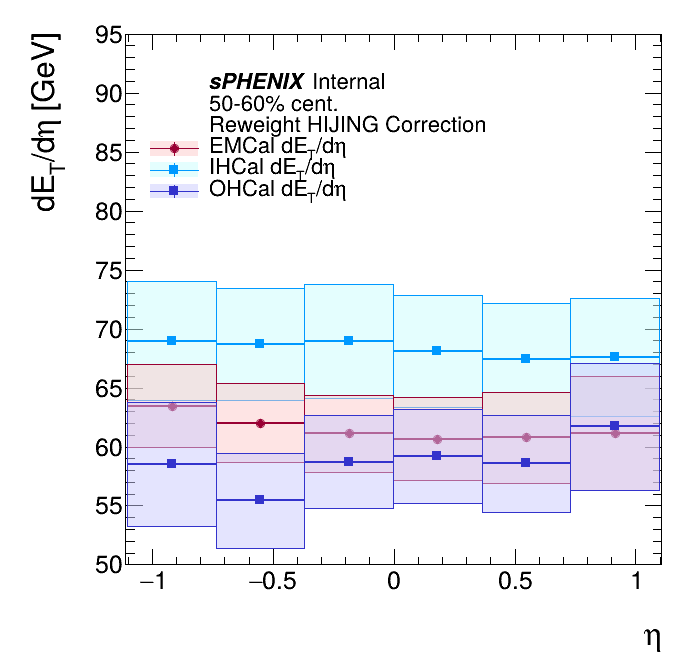

In [178]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.7,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight HIJING Correction ","")
leg.AddEntry(emcal_hijing_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(ihcal_hijing_errors,"IHCal dE_{T}/d#eta","lepf")
leg.AddEntry(ohcal_hijing_errors,"OHCal dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
ihcal_hijing_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
ihcal_hijing_errors.GetXaxis().SetRangeUser(-1.1,1.1)
ihcal_hijing_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
ihcal_hijing_errors.GetXaxis().SetTitle("#eta")
ihcal_hijing_errors.GetYaxis().SetTitleSize(0.05)
ihcal_hijing_errors.GetXaxis().SetLabelSize(0.04)
ihcal_hijing_errors.GetYaxis().SetLabelSize(0.04)

emcal_hijing_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_hijing_errors.SetLineColor(ROOT.kPink-6)
emcal_hijing_errors.SetMarkerColor(ROOT.kPink-6)
emcal_hijing_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_hijing.SetLineColor(ROOT.kPink-6)
emcal_detdeta_hijing.SetMarkerColor(ROOT.kPink-6)

ihcal_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
ihcal_hijing_errors.SetLineColor(ROOT.kAzure+7)
ihcal_hijing_errors.SetMarkerColor(ROOT.kAzure+7)
ihcal_hijing_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
ihcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
ihcal_detdeta_hijing.SetLineColor(ROOT.kAzure+7)
ihcal_detdeta_hijing.SetMarkerColor(ROOT.kAzure+7)

ohcal_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
ohcal_hijing_errors.SetLineColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetMarkerColor(ROOT.kBlue-3)
ohcal_hijing_errors.SetFillColorAlpha(ROOT.kBlue-10,0.5)
ohcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
ohcal_detdeta_hijing.SetLineColor(ROOT.kBlue-3)
ohcal_detdeta_hijing.SetMarkerColor(ROOT.kBlue-3)

ihcal_hijing_errors.Draw("A5")
ihcal_detdeta_hijing.Draw("P same")
emcal_hijing_errors.Draw("5")
emcal_detdeta_hijing.Draw("P same")
ohcal_hijing_errors.Draw("5")
ohcal_detdeta_hijing.Draw("P same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/detdeta_reweight_hijing_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/detdeta_reweight_epos_50-60.png has been created


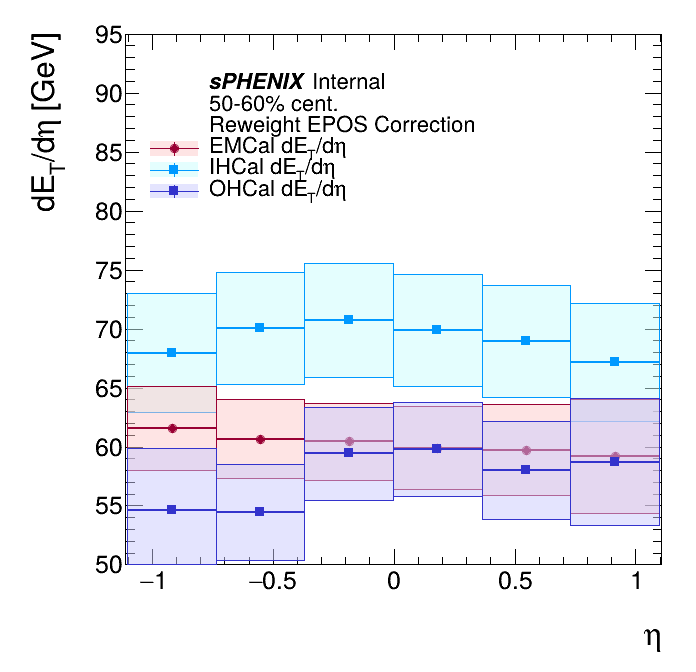

In [179]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.7,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight EPOS Correction ","")
leg.AddEntry(emcal_epos_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(ihcal_epos_errors,"IHCal dE_{T}/d#eta","lepf")
leg.AddEntry(ohcal_epos_errors,"OHCal dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
ihcal_epos_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
ihcal_epos_errors.GetXaxis().SetRangeUser(-1.1,1.1)
ihcal_epos_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
ihcal_epos_errors.GetXaxis().SetTitle("#eta")
ihcal_epos_errors.GetYaxis().SetTitleSize(0.05)
ihcal_epos_errors.GetXaxis().SetLabelSize(0.04)
ihcal_epos_errors.GetYaxis().SetLabelSize(0.04)
emcal_epos_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_epos_errors.SetLineColor(ROOT.kPink-6)
emcal_epos_errors.SetMarkerColor(ROOT.kPink-6)
emcal_epos_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_epos.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_epos.SetLineColor(ROOT.kPink-6)
emcal_detdeta_epos.SetMarkerColor(ROOT.kPink-6)
ihcal_epos_errors.SetMarkerStyle(ROOT.kFullSquare)
ihcal_epos_errors.SetLineColor(ROOT.kAzure+7)
ihcal_epos_errors.SetMarkerColor(ROOT.kAzure+7)
ihcal_epos_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
ohcal_epos_errors.SetMarkerStyle(ROOT.kFullSquare)
ohcal_epos_errors.SetLineColor(ROOT.kBlue-3)
ohcal_epos_errors.SetMarkerColor(ROOT.kBlue-3)
ohcal_epos_errors.SetFillColorAlpha(ROOT.kBlue-10,0.5)
ihcal_detdeta_epos.SetMarkerStyle(ROOT.kFullSquare)
ihcal_detdeta_epos.SetLineColor(ROOT.kAzure+7)
ihcal_detdeta_epos.SetMarkerColor(ROOT.kAzure+7)
ohcal_detdeta_epos.SetMarkerStyle(ROOT.kFullSquare)
ohcal_detdeta_epos.SetLineColor(ROOT.kBlue-3)
ohcal_detdeta_epos.SetMarkerColor(ROOT.kBlue-3)
ihcal_epos_errors.Draw("A5")
ihcal_detdeta_epos.Draw("P same")

emcal_epos_errors.Draw("5")
emcal_detdeta_epos.Draw("P same")
ohcal_epos_errors.Draw("5")
ohcal_detdeta_epos.Draw("P same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/detdeta_reweight_epos_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/detdeta_reweight_ampt_50-60.png has been created


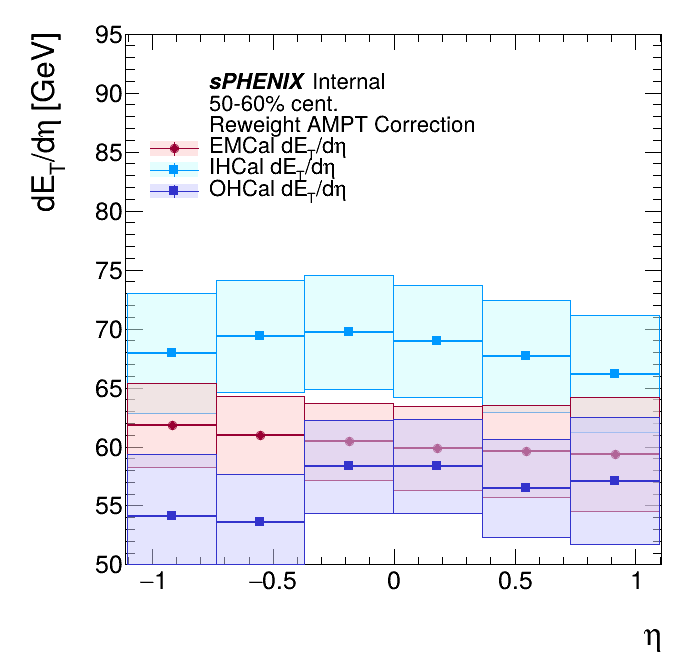

In [180]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.7,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight AMPT Correction ","")
leg.AddEntry(emcal_ampt_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(ihcal_ampt_errors,"IHCal dE_{T}/d#eta","lepf")
leg.AddEntry(ohcal_ampt_errors,"OHCal dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
ihcal_ampt_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
ihcal_ampt_errors.GetXaxis().SetRangeUser(-1.1,1.1)
ihcal_ampt_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
ihcal_ampt_errors.GetXaxis().SetTitle("#eta")
ihcal_ampt_errors.GetYaxis().SetTitleSize(0.05)
ihcal_ampt_errors.GetXaxis().SetLabelSize(0.04)
ihcal_ampt_errors.GetYaxis().SetLabelSize(0.04)
emcal_ampt_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_ampt_errors.SetLineColor(ROOT.kPink-6)
emcal_ampt_errors.SetMarkerColor(ROOT.kPink-6)
emcal_ampt_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_ampt.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_ampt.SetLineColor(ROOT.kPink-6)
emcal_detdeta_ampt.SetMarkerColor(ROOT.kPink-6)
ihcal_ampt_errors.SetMarkerStyle(ROOT.kFullSquare)
ihcal_ampt_errors.SetLineColor(ROOT.kAzure+7)
ihcal_ampt_errors.SetMarkerColor(ROOT.kAzure+7)
ihcal_ampt_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
ohcal_ampt_errors.SetMarkerStyle(ROOT.kFullSquare)
ohcal_ampt_errors.SetLineColor(ROOT.kBlue-3)
ohcal_ampt_errors.SetMarkerColor(ROOT.kBlue-3)
ohcal_ampt_errors.SetFillColorAlpha(ROOT.kBlue-10,0.5)
ihcal_detdeta_ampt.SetMarkerStyle(ROOT.kFullSquare)
ihcal_detdeta_ampt.SetLineColor(ROOT.kAzure+7)
ihcal_detdeta_ampt.SetMarkerColor(ROOT.kAzure+7)
ohcal_detdeta_ampt.SetMarkerStyle(ROOT.kFullSquare)
ohcal_detdeta_ampt.SetLineColor(ROOT.kBlue-3)
ohcal_detdeta_ampt.SetMarkerColor(ROOT.kBlue-3)
ihcal_ampt_errors.Draw("A5")
ihcal_detdeta_ampt.Draw("P same")

emcal_ampt_errors.Draw("5")
emcal_detdeta_ampt.Draw("P same")
ohcal_ampt_errors.Draw("5")
ohcal_detdeta_ampt.Draw("P same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/detdeta_reweight_ampt_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/detdeta_reweight_hijing_full_calo_50-60.png has been created


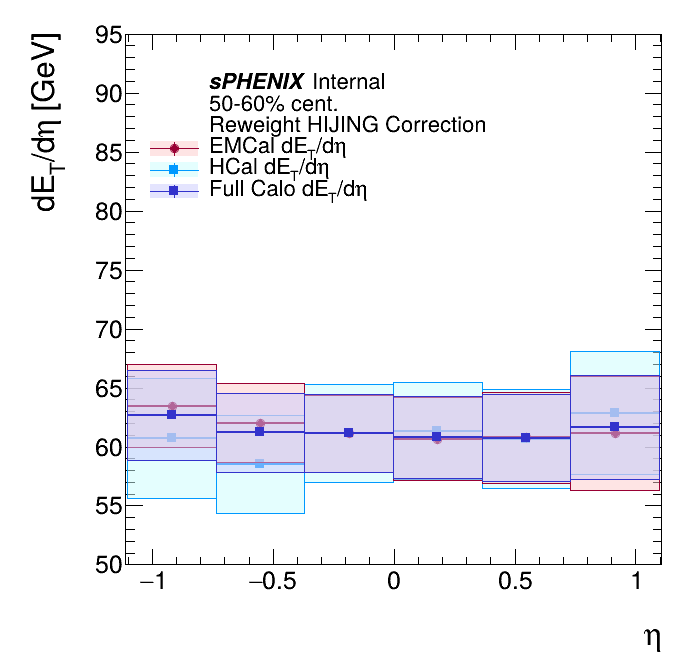

In [181]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.7,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight HIJING Correction ","")
leg.AddEntry(emcal_hijing_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(hcal_hijing_errors,"HCal dE_{T}/d#eta","lepf")
leg.AddEntry(calo_hijing_errors,"Full Calo dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
hcal_hijing_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
hcal_hijing_errors.GetXaxis().SetRangeUser(-1.1,1.1)
hcal_hijing_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
hcal_hijing_errors.GetXaxis().SetTitle("#eta")
hcal_hijing_errors.GetYaxis().SetTitleSize(0.05)
hcal_hijing_errors.GetXaxis().SetLabelSize(0.04)
hcal_hijing_errors.GetYaxis().SetLabelSize(0.04)

emcal_hijing_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_hijing_errors.SetLineColor(ROOT.kPink-6)
emcal_hijing_errors.SetMarkerColor(ROOT.kPink-6)
emcal_hijing_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_hijing.SetLineColor(ROOT.kPink-6)
emcal_detdeta_hijing.SetMarkerColor(ROOT.kPink-6)

hcal_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
hcal_hijing_errors.SetLineColor(ROOT.kAzure+7)
hcal_hijing_errors.SetMarkerColor(ROOT.kAzure+7)
hcal_hijing_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
hcal_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
hcal_detdeta_hijing.SetLineColor(ROOT.kAzure+7)
hcal_detdeta_hijing.SetMarkerColor(ROOT.kAzure+7)

calo_hijing_errors.SetMarkerStyle(ROOT.kFullSquare)
calo_hijing_errors.SetLineColor(ROOT.kBlue-3)
calo_hijing_errors.SetMarkerColor(ROOT.kBlue-3)
calo_hijing_errors.SetFillColorAlpha(ROOT.kBlue-10,0.5)
calo_detdeta_hijing.SetMarkerStyle(ROOT.kFullSquare)
calo_detdeta_hijing.SetLineColor(ROOT.kBlue-3)
calo_detdeta_hijing.SetMarkerColor(ROOT.kBlue-3)

hcal_hijing_errors.Draw("A5")
hcal_detdeta_hijing.Draw("P same")
emcal_hijing_errors.Draw("5")
emcal_detdeta_hijing.Draw("P same")
calo_hijing_errors.Draw("5")
calo_detdeta_hijing.Draw("P same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/detdeta_reweight_hijing_full_calo_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/detdeta_reweight_epos_full_calo_50-60.png has been created


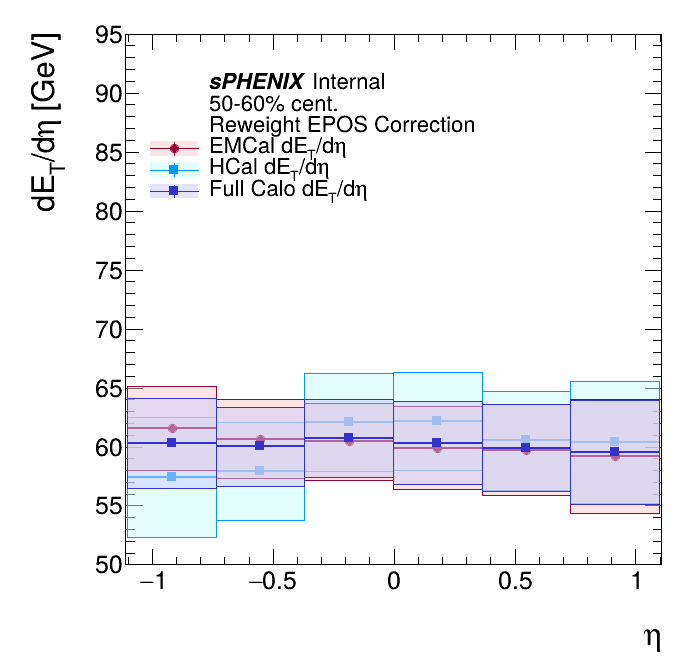

In [182]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.7,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight EPOS Correction ","")
leg.AddEntry(emcal_epos_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(hcal_epos_errors,"HCal dE_{T}/d#eta","lepf")
leg.AddEntry(calo_epos_errors,"Full Calo dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
hcal_epos_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
hcal_epos_errors.GetXaxis().SetRangeUser(-1.1,1.1)
hcal_epos_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
hcal_epos_errors.GetXaxis().SetTitle("#eta")
hcal_epos_errors.GetYaxis().SetTitleSize(0.05)
hcal_epos_errors.GetXaxis().SetLabelSize(0.04)
hcal_epos_errors.GetYaxis().SetLabelSize(0.04)

emcal_epos_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_epos_errors.SetLineColor(ROOT.kPink-6)
emcal_epos_errors.SetMarkerColor(ROOT.kPink-6)
emcal_epos_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_epos.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_epos.SetLineColor(ROOT.kPink-6)
emcal_detdeta_epos.SetMarkerColor(ROOT.kPink-6)

hcal_epos_errors.SetMarkerStyle(ROOT.kFullSquare)
hcal_epos_errors.SetLineColor(ROOT.kAzure+7)
hcal_epos_errors.SetMarkerColor(ROOT.kAzure+7)
hcal_epos_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
hcal_detdeta_epos.SetMarkerStyle(ROOT.kFullSquare)
hcal_detdeta_epos.SetLineColor(ROOT.kAzure+7)
hcal_detdeta_epos.SetMarkerColor(ROOT.kAzure+7)

calo_epos_errors.SetMarkerStyle(ROOT.kFullSquare)
calo_epos_errors.SetLineColor(ROOT.kBlue-3)
calo_epos_errors.SetMarkerColor(ROOT.kBlue-3)
calo_epos_errors.SetFillColorAlpha(ROOT.kBlue-10,0.5)
calo_detdeta_epos.SetMarkerStyle(ROOT.kFullSquare)
calo_detdeta_epos.SetLineColor(ROOT.kBlue-3)
calo_detdeta_epos.SetMarkerColor(ROOT.kBlue-3)

hcal_epos_errors.Draw("A5")
hcal_detdeta_epos.Draw("P same")
emcal_epos_errors.Draw("5")
emcal_detdeta_epos.Draw("P same")
calo_epos_errors.Draw("5")
calo_detdeta_epos.Draw("P same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/detdeta_reweight_epos_full_calo_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/nominal_plots/detdeta_reweight_ampt_full_calo_50-60.png has been created


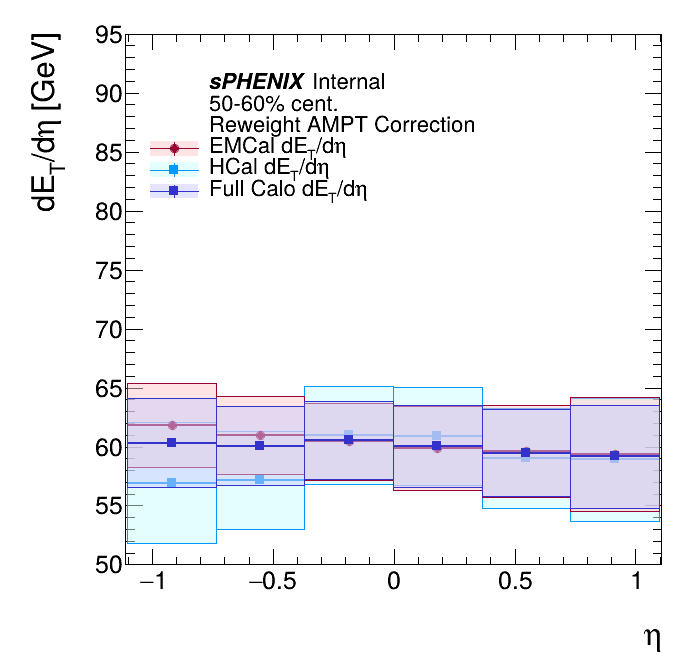

In [183]:
canvas = TCanvas("canvas","",700,700)
leg = ROOT.TLegend(.2,.7,.6,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent}% cent.","")
leg.AddEntry("","Reweight AMPT Correction ","")
leg.AddEntry(emcal_ampt_errors,"EMCal dE_{T}/d#eta","lpef")
leg.AddEntry(hcal_ampt_errors,"HCal dE_{T}/d#eta","lepf")
leg.AddEntry(calo_ampt_errors,"Full Calo dE_{T}/d#eta","lepf")
canvas.SetLeftMargin(0.18)
leg.SetTextSize(0.035)
leg.SetBorderSize(0)
hcal_ampt_errors.GetYaxis().SetRangeUser(lowbound[cent],highbound[cent])
hcal_ampt_errors.GetXaxis().SetRangeUser(-1.1,1.1)
hcal_ampt_errors.GetYaxis().SetTitle("dE_{T}/d#eta [GeV]")
hcal_ampt_errors.GetXaxis().SetTitle("#eta")
hcal_ampt_errors.GetYaxis().SetTitleSize(0.05)
hcal_ampt_errors.GetXaxis().SetLabelSize(0.04)
hcal_ampt_errors.GetYaxis().SetLabelSize(0.04)

emcal_ampt_errors.SetMarkerStyle(ROOT.kFullCircle)
emcal_ampt_errors.SetLineColor(ROOT.kPink-6)
emcal_ampt_errors.SetMarkerColor(ROOT.kPink-6)
emcal_ampt_errors.SetFillColorAlpha(ROOT.kRed-10,0.5)
emcal_detdeta_ampt.SetMarkerStyle(ROOT.kFullCircle)
emcal_detdeta_ampt.SetLineColor(ROOT.kPink-6)
emcal_detdeta_ampt.SetMarkerColor(ROOT.kPink-6)

hcal_ampt_errors.SetMarkerStyle(ROOT.kFullSquare)
hcal_ampt_errors.SetLineColor(ROOT.kAzure+7)
hcal_ampt_errors.SetMarkerColor(ROOT.kAzure+7)
hcal_ampt_errors.SetFillColorAlpha(ROOT.kCyan-10,0.5)
hcal_detdeta_ampt.SetMarkerStyle(ROOT.kFullSquare)
hcal_detdeta_ampt.SetLineColor(ROOT.kAzure+7)
hcal_detdeta_ampt.SetMarkerColor(ROOT.kAzure+7)

calo_ampt_errors.SetMarkerStyle(ROOT.kFullSquare)
calo_ampt_errors.SetLineColor(ROOT.kBlue-3)
calo_ampt_errors.SetMarkerColor(ROOT.kBlue-3)
calo_ampt_errors.SetFillColorAlpha(ROOT.kBlue-10,0.5)
calo_detdeta_ampt.SetMarkerStyle(ROOT.kFullSquare)
calo_detdeta_ampt.SetLineColor(ROOT.kBlue-3)
calo_detdeta_ampt.SetMarkerColor(ROOT.kBlue-3)

hcal_ampt_errors.Draw("A5")
hcal_detdeta_ampt.Draw("P same")
emcal_ampt_errors.Draw("5")
emcal_detdeta_ampt.Draw("P same")
calo_ampt_errors.Draw("5")
calo_detdeta_ampt.Draw("P same")
leg.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/'+direct+'/detdeta_reweight_ampt_full_calo_'+cent+'.png')